In [9]:
from collections import Counter
import matplotlib.pyplot as plt
import networkx as nx
import re
import pandas as pd
import sys
import time
import tweepy
import nltk
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import csv
from TwitterAPI import TwitterAPI

In [10]:
with open('trainer.csv', 'r') as f:
    tweets = pd.read_csv(f,header=0,names=['Name','Id','Created at','Text','Polarity','Retweet Count','Fav Count'])
tweets.head()

,Name,Id,Created at,Text,Polarity,Retweet Count,Fav Count
0,BarackObama,966704319658647553,2018-02-22 16:00:44,b'Young people have helped lead all our great ...,4,421736,1510414
1,BarackObama,966350067287363584,2018-02-21 16:33:04,b'Billy Graham was a humble servant who prayed...,4,34176,242795
2,BarackObama,964185606803853314,2018-02-15 17:12:17,b'We are grieving with Parkland. But we are no...,4,382286,1316824
3,BarackObama,963811333685817346,2018-02-14 16:25:03,"b'Happy Valentine\xe2\x80\x99s Day, @MichelleO...",4,245433,1514759
4,BarackObama,963811162482728961,2018-02-14 16:24:22,b'RT @MichelleObama: Happy #ValentinesDay to m...,4,26638,0


In [11]:
tweets.tail()

,Name,Id,Created at,Text,Polarity,Retweet Count,Fav Count
35755,mtbarra,432323153675550721,2014-02-09 01:20:46,b'Congrats to Dan Akerson for his leadership #...,4,26,37
35756,mtbarra,410514510647017472,2013-12-10 21:01:00,b'Thanks to Dan Akerson for his amazing leader...,4,123,105
35757,mtbarra,410513188984066048,2013-12-10 20:55:45,b'Thanks everyone for your well wishes.',4,87,120
35758,mtbarra,329049536976781313,2013-04-30 01:48:17,"b""RT @Cadillac: The All-New #Cadillac #ELR at ...",0,46,0
35759,mtbarra,326007765011136512,2013-04-21 16:21:22,"b'#Karmanos Annual Dinner raised $2.5 M, great...",4,5,9


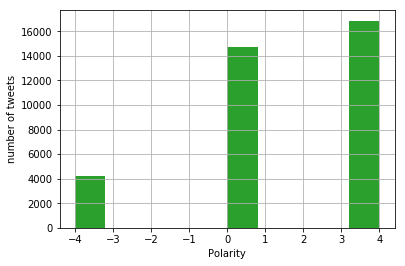

In [14]:
tweets['Polarity'].hist()
plt.xlabel('Polarity')
plt.ylabel('number of tweets')
plt.show()